In [1]:
import numpy as np  # type:ignore
import pandas as pd  # type:ignore
import torch  # type:ignore
from torch.utils.data import DataLoader  # type:ignore
from torchvision import transforms  # type:ignore
from torchvision.datasets import CIFAR10  # type:ignore
import sys
sys.path.append("../")
from PyTorch_CIFAR10.cifar10_models.mobilenetv2 import mobilenet_v2
from PyTorch_CIFAR10.UTILS_TORCH import *

In [2]:
device = torch.device("mps" if torch.mps.is_available() else "cpu")
print(f"Currently using: '{device}'")

Currently using: 'mps'


In [3]:
# Hyperparameters
NUM_EPOCHS = 100
BATCH_SIZE = 64
LEARN_RATE = 0.001
ALPHA = 0.01  # distillation_loss
TEMP = 2.5
OVERLAY_PROB = 0.1
GAMMAS = [0.5]
# GAMMAS = [0.1, 0.25, 0.5, 0.75, 0.9]
NUM_WORKERS = 10
# SAVE = "Histories/Results/AT.csv"
IGS = "../../../ML/PyTorch_CIFAR10/data/Captum_IGs.npy"

In [4]:
precomputed_logits = np.load("../../../ML/PyTorch_CIFAR10/data/cifar10_logits.npy")
print("Shape of teacher_logits:", precomputed_logits.shape)

precomputed_attn = np.load("../../../ML/PyTorch_CIFAR10/data/cifar10_attention_maps.npy")
print("Shape of teacher_logits:", precomputed_attn.shape)

igs = np.load(IGS)

Shape of teacher_logits: (50000, 10)
Shape of teacher_logits: (50000, 8, 8)


In [5]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize(
        #     mean=[0.4914, 0.4822, 0.4465], std=[0.2471, 0.2435, 0.2616]
        # ),
    ]
)

student_aug = transforms.Compose(
    [
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize(
        #     mean=[0.4914, 0.4822, 0.4465], std=[0.2471, 0.2435, 0.2616]
        # ),
    ]
)

In [6]:
train_dataset = CIFAR10WithIG(
    igs=igs,
    root="../../../ML/PyTorch_CIFAR10/data",
    train=True,
    transform=student_aug,
    overlay_prob=OVERLAY_PROB,
    return_ig=False,
    precomputed_logits=precomputed_logits,
    precomputed_attn=precomputed_attn,
)

# Load the data into batches
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=False,
    persistent_workers=True,
)

# load student data
test_data = CIFAR10(
    root="../../../ML/PyTorch_CIFAR10/data",
    train=False,
    download=False,
    transform=transform,
)

test_loader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=False,
    persistent_workers=True,
)

In [7]:
Student = ModifiedStudent(mobilenet_v2(pretrained=False))
Student.to(device);

In [8]:
Student, acc = train_eval_AT(
    student=Student,
    train_loader=train_loader,
    test_loader=test_loader,
    epochs=NUM_EPOCHS,
    lr=LEARN_RATE,
    TEMP=TEMP,
    ALPHA=ALPHA,
    GAMMA=GAMMAS[0],
    device=device,
    csv_path=f"../../../ML/PyTorch_CIFAR10/Histories/Testing/AT_{GAMMAS[0]}.csv",
)

Epoch 1/100:   0%|          | 0/782 [00:00<?, ?it/s]/Users/davidhernandez/anaconda3/envs/torchm1/lib/python3.12/site-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 1/100: Loss: 1.4865,            Accuracy: 47.21%


Epoch 2/100: Loss: 1.0430,            Accuracy: 65.16%


Epoch 3/100: Loss: 0.8612,            Accuracy: 72.36%


Epoch 4/100: Loss: 0.7577,            Accuracy: 76.26%


Epoch 5/100: Loss: 0.6999,            Accuracy: 78.27%


Epoch 6/100: Loss: 0.6502,            Accuracy: 80.12%


Epoch 7/100: Loss: 0.6114,            Accuracy: 81.68%


Epoch 8/100: Loss: 0.5783,            Accuracy: 82.87%


Epoch 9/100: Loss: 0.5454,            Accuracy: 84.00%


Epoch 10/100: Loss: 0.5197,            Accuracy: 85.00%


Epoch 11/100: Loss: 0.4976,            Accuracy: 85.79%


Epoch 12/100: Loss: 0.4766,            Accuracy: 86.52%


Epoch 13/100: Loss: 0.4604,            Accuracy: 87.23%


Epoch 14/100: Loss: 0.4449,            Accuracy: 87.76%


Epoch 15/100: Loss: 0.4305,            Accuracy: 88.18%


Epoch 16/100: Loss: 0.4172,            Accuracy: 88.73%


Epoch 17/100: Loss: 0.4051,            Accuracy: 89.11%


Epoch 18/100: Loss: 0.3918,            Accuracy: 89.59%


Epoch 19/100: Loss: 0.3790,            Accuracy: 90.15%


Epoch 20/100: Loss: 0.3710,            Accuracy: 90.36%


Epoch 21/100: Loss: 0.3598,            Accuracy: 90.76%


Epoch 22/100: Loss: 0.3479,            Accuracy: 91.15%


Epoch 23/100: Loss: 0.3404,            Accuracy: 91.35%


Epoch 24/100: Loss: 0.3339,            Accuracy: 91.74%


Epoch 25/100: Loss: 0.3282,            Accuracy: 91.94%


Epoch 26/100: Loss: 0.3184,            Accuracy: 92.22%


Epoch 27/100: Loss: 0.3098,            Accuracy: 92.59%


Epoch 28/100: Loss: 0.3028,            Accuracy: 92.90%


Epoch 29/100: Loss: 0.2970,            Accuracy: 92.97%


Epoch 30/100: Loss: 0.2940,            Accuracy: 93.11%


Epoch 31/100: Loss: 0.2878,            Accuracy: 93.37%


Epoch 32/100: Loss: 0.2847,            Accuracy: 93.34%


Epoch 33/100: Loss: 0.2749,            Accuracy: 93.87%


Epoch 34/100: Loss: 0.2730,            Accuracy: 93.95%


Epoch 35/100: Loss: 0.2681,            Accuracy: 94.06%


Epoch 36/100: Loss: 0.2620,            Accuracy: 94.31%


Epoch 37/100: Loss: 0.2566,            Accuracy: 94.52%


Epoch 38/100: Loss: 0.2539,            Accuracy: 94.50%


Epoch 39/100: Loss: 0.2495,            Accuracy: 94.73%


Epoch 40/100: Loss: 0.2461,            Accuracy: 94.89%


Epoch 41/100: Loss: 0.2419,            Accuracy: 95.04%


Epoch 42/100: Loss: 0.2398,            Accuracy: 95.02%


Epoch 43/100: Loss: 0.2377,            Accuracy: 95.15%


Epoch 44/100: Loss: 0.2316,            Accuracy: 95.32%


Epoch 45/100: Loss: 0.2289,            Accuracy: 95.56%


Epoch 46/100: Loss: 0.2263,            Accuracy: 95.61%


Epoch 47/100: Loss: 0.2232,            Accuracy: 95.72%


Epoch 48/100: Loss: 0.2209,            Accuracy: 95.71%


Epoch 49/100: Loss: 0.2186,            Accuracy: 95.82%


Epoch 50/100: Loss: 0.2177,            Accuracy: 95.86%


Epoch 51/100: Loss: 0.2123,            Accuracy: 96.04%


Epoch 52/100: Loss: 0.2099,            Accuracy: 96.14%


Epoch 53/100: Loss: 0.2076,            Accuracy: 96.26%


Epoch 54/100: Loss: 0.2052,            Accuracy: 96.29%


Epoch 55/100: Loss: 0.2040,            Accuracy: 96.30%


Epoch 56/100: Loss: 0.2030,            Accuracy: 96.42%


Epoch 57/100: Loss: 0.1973,            Accuracy: 96.57%


Epoch 58/100: Loss: 0.2002,            Accuracy: 96.45%


Epoch 59/100: Loss: 0.1972,            Accuracy: 96.55%


Epoch 60/100: Loss: 0.1954,            Accuracy: 96.70%


Epoch 61/100: Loss: 0.1941,            Accuracy: 96.74%


Epoch 62/100: Loss: 0.1884,            Accuracy: 96.93%


Epoch 63/100: Loss: 0.1884,            Accuracy: 96.92%


Epoch 64/100: Loss: 0.1878,            Accuracy: 96.95%


Epoch 65/100: Loss: 0.1852,            Accuracy: 97.01%


Epoch 66/100: Loss: 0.1814,            Accuracy: 97.18%


Epoch 67/100: Loss: 0.1816,            Accuracy: 97.22%


Epoch 68/100: Loss: 0.1848,            Accuracy: 97.10%


Epoch 69/100: Loss: 0.1789,            Accuracy: 97.31%


Epoch 70/100: Loss: 0.1751,            Accuracy: 97.38%


Epoch 71/100: Loss: 0.1781,            Accuracy: 97.32%


Epoch 72/100: Loss: 0.1763,            Accuracy: 97.34%


Epoch 73/100: Loss: 0.1749,            Accuracy: 97.31%


Epoch 74/100: Loss: 0.1743,            Accuracy: 97.37%


Epoch 75/100: Loss: 0.1752,            Accuracy: 97.34%


Epoch 76/100: Loss: 0.1704,            Accuracy: 97.54%


Epoch 77/100: Loss: 0.1674,            Accuracy: 97.60%


Epoch 78/100: Loss: 0.1705,            Accuracy: 97.52%


Epoch 79/100: Loss: 0.1705,            Accuracy: 97.51%


Epoch 80/100: Loss: 0.1641,            Accuracy: 97.69%


Epoch 81/100: Loss: 0.1664,            Accuracy: 97.73%


Epoch 82/100: Loss: 0.1678,            Accuracy: 97.63%


Epoch 83/100: Loss: 0.1636,            Accuracy: 97.82%


Epoch 84/100: Loss: 0.1649,            Accuracy: 97.71%


Epoch 85/100: Loss: 0.1601,            Accuracy: 97.87%


Epoch 86/100: Loss: 0.1625,            Accuracy: 97.80%


Epoch 87/100: Loss: 0.1608,            Accuracy: 97.89%


Epoch 88/100: Loss: 0.1611,            Accuracy: 97.82%


Epoch 89/100: Loss: 0.1576,            Accuracy: 98.01%


Epoch 90/100: Loss: 0.1584,            Accuracy: 98.00%


Epoch 91/100: Loss: 0.1599,            Accuracy: 97.89%


Epoch 92/100: Loss: 0.1569,            Accuracy: 97.94%


Epoch 93/100: Loss: 0.1559,            Accuracy: 98.00%


Epoch 94/100: Loss: 0.1556,            Accuracy: 98.07%


Epoch 95/100: Loss: 0.1525,            Accuracy: 98.13%


Epoch 96/100: Loss: 0.1493,            Accuracy: 98.26%


Epoch 97/100: Loss: 0.1536,            Accuracy: 98.03%


Epoch 98/100: Loss: 0.1527,            Accuracy: 98.11%


Epoch 99/100: Loss: 0.1509,            Accuracy: 98.27%


Epoch 100/100: Loss: 0.1512,            Accuracy: 98.16%


In [9]:
print(f"Test Acc = {acc:.2f}%")

Test Acc = 92.14%


In [10]:
torch.save(Student.state_dict(), "../saved_models/Student_attention.pt")

In [8]:
Student.load_state_dict(torch.load("../saved_models/Student_attention.pt", weights_only=True));

In [9]:
teacher_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2471, 0.2435, 0.2616]
        ),
    ]
)

# load student data
teacher_data = CIFAR10(
    root="../../../ML/PyTorch_CIFAR10/data",
    train=False,
    download=False,
    transform=teacher_transform,
)

teacher_loader = DataLoader(
    teacher_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=False,
    persistent_workers=True,
)

In [10]:
Teacher = mobilenet_v2(pretrained=True)
Teacher.to(device);

/Users/davidhernandez/Desktop/Nordling_Lab/KD_IG_Code/Jupyter_notebooks/../PyTorch_CIFAR10/cifar10_models/mobilenetv2.py:138: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  s

# Testing the Modified Teacher Perfomance

In [11]:
test_model(Teacher, teacher_loader, device, 'Testing')

Accuracy of the model on the Testing images: 93.91


In [12]:
Teacher_att = ModifiedTeacher(mobilenet_v2(pretrained=True))
Teacher_att.to(device);

In [13]:
test_model_att(Teacher_att, teacher_loader, device)

Accuracy of the model on the Testing images: 93.91 %


In [14]:
teacher_aug = transforms.Compose(
    [
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2471, 0.2435, 0.2616]
        ),
    ]
)

# load student data
teacher_train = CIFAR10(
    root="../../../ML/PyTorch_CIFAR10/data",
    train=True,
    download=False,
    transform=teacher_aug,
)

teacher_trainloader = DataLoader(
    teacher_train,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=False,
    persistent_workers=True,
)

# Precomputing the attention maps

In [20]:
Teacher_att.eval()

# Initialize a list to hold all attention maps
all_attention_maps = []

# Loop through the dataset
for inputs, _ in teacher_trainloader:
    inputs = inputs.to(device)
    logits, attention_maps = Teacher_att(inputs)
    
    # Move attention maps to CPU and convert to numpy
    attention_maps_np = attention_maps.detach().cpu().numpy()
    all_attention_maps.append(attention_maps_np)

# Concatenate all attention maps along the first axis (batch axis)
all_attention_maps_np = np.concatenate(all_attention_maps, axis=0)

# Save the complete array of attention maps
np.save("../PyTorch_CIFAR10/data/cifar10_attention_maps.npy", all_attention_maps_np)
print(all_attention_maps_np.shape)

(50000, 64)


# Comparing Attention maps

In [15]:
teacher_attention_maps = {i: None for i in range(10)}
student_attention_maps = {i: None for i in range(10)}

with torch.no_grad():
    for (t_img, _), (s_img, labels) in zip(teacher_loader, test_loader):
        t_img, s_img, labels = t_img.to(device), s_img.to(device), labels.to(device)
        
        # Teacher outputs
        t_out, t_at = Teacher_att(t_img)

        # Student outputs
        s_out, s_at = Student(s_img)

        # Iterate over each label and corresponding attention maps in the batch
        for label, t_attention_map, s_attention_map in zip(labels, t_at, s_at):
            label = label.item()  # Get the scalar value if it's a tensor
            if teacher_attention_maps[label] is None:
                # Store the teacher's attention map for this class if not already stored
                teacher_attention_maps[label] = t_attention_map.cpu().detach()

            if student_attention_maps[label] is None:
                # Store the student's attention map for this class if not already stored
                student_attention_maps[label] = s_attention_map.cpu().detach()

        # Optional: Break the loop if all classes have attention maps stored
        if all(v is not None for v in teacher_attention_maps.values()) and all(v is not None for v in student_attention_maps.values()):
            break

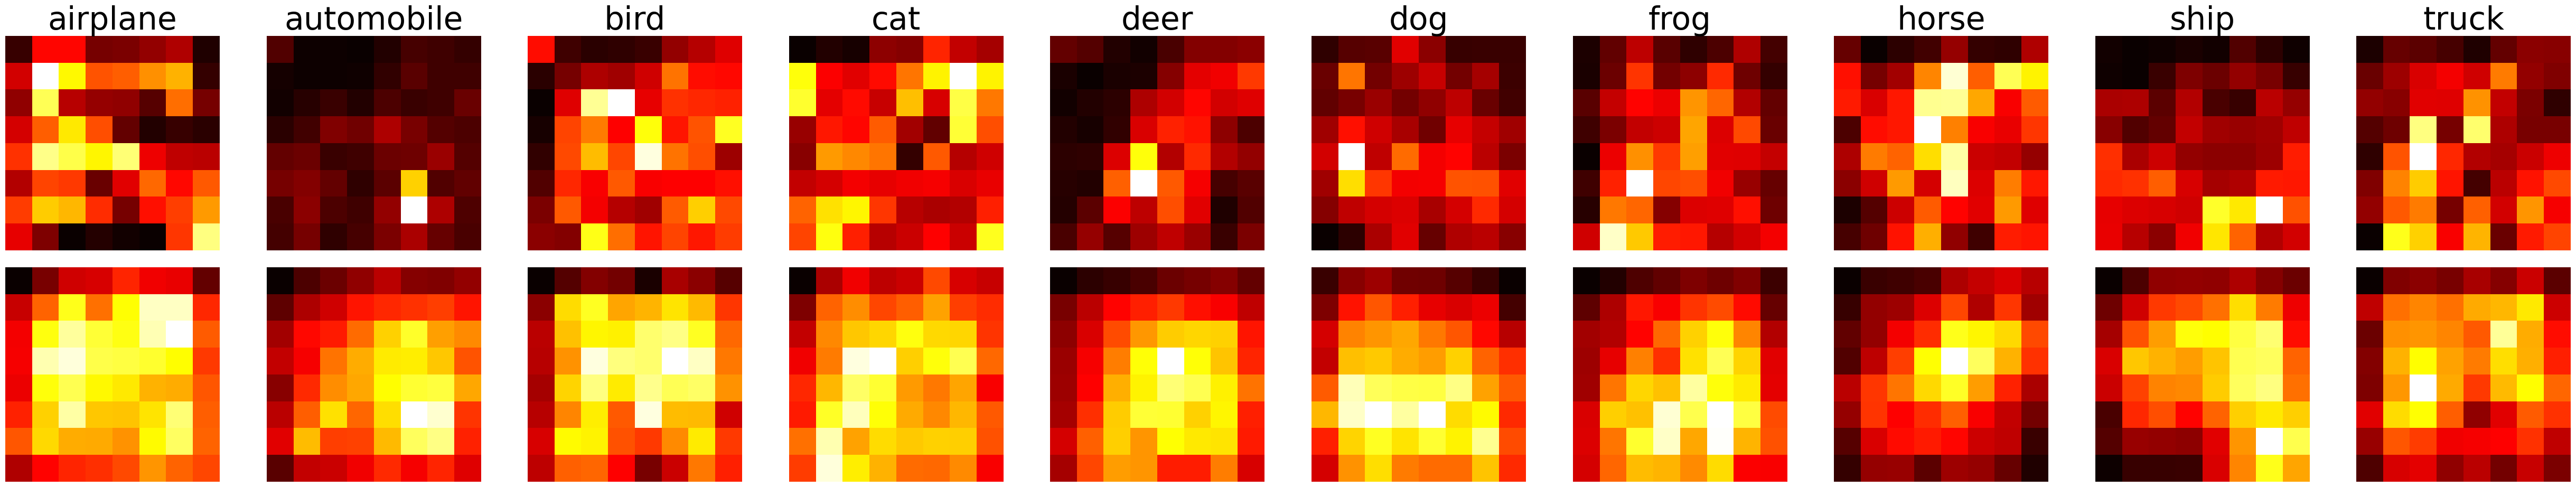

In [16]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

num_classes = len(teacher_attention_maps)
fig, axs = plt.subplots(2, num_classes, figsize=(num_classes * 5, 10))  # Adjust figure size as needed
plt.rcParams['font.size'] = 36
def reshape_map(att_map):
    # Assuming the attention map needs to be square
    size = int(np.sqrt(len(att_map)))  # This assumes the map is of size n^2
    return att_map.reshape(size, size)

for i, (teacher_map, student_map) in enumerate(zip(teacher_attention_maps.values(), student_attention_maps.values())):
    if teacher_map is not None and student_map is not None:
        # Reshape maps if they are not in the correct shape
        if teacher_map.ndim == 1:
            teacher_map = reshape_map(teacher_map)
        if student_map.ndim == 1:
            student_map = reshape_map(student_map)
        
        # Plot teacher's attention map
        ax = axs[0, i]  # Row i, Column 0 for teacher
        ax.imshow(teacher_map, cmap='hot')  # Adjust cmap as needed
        ax.set_title(f'{class_names[i]}')
        ax.axis('off')  # Turn off axis labels

        # Plot student's attention map
        ax = axs[1, i]  # Row i, Column 1 for student
        ax.imshow(student_map, cmap='hot')
        # ax.set_title(f'{class_names[i]}')
        ax.axis('off')

plt.tight_layout()
plt.show()

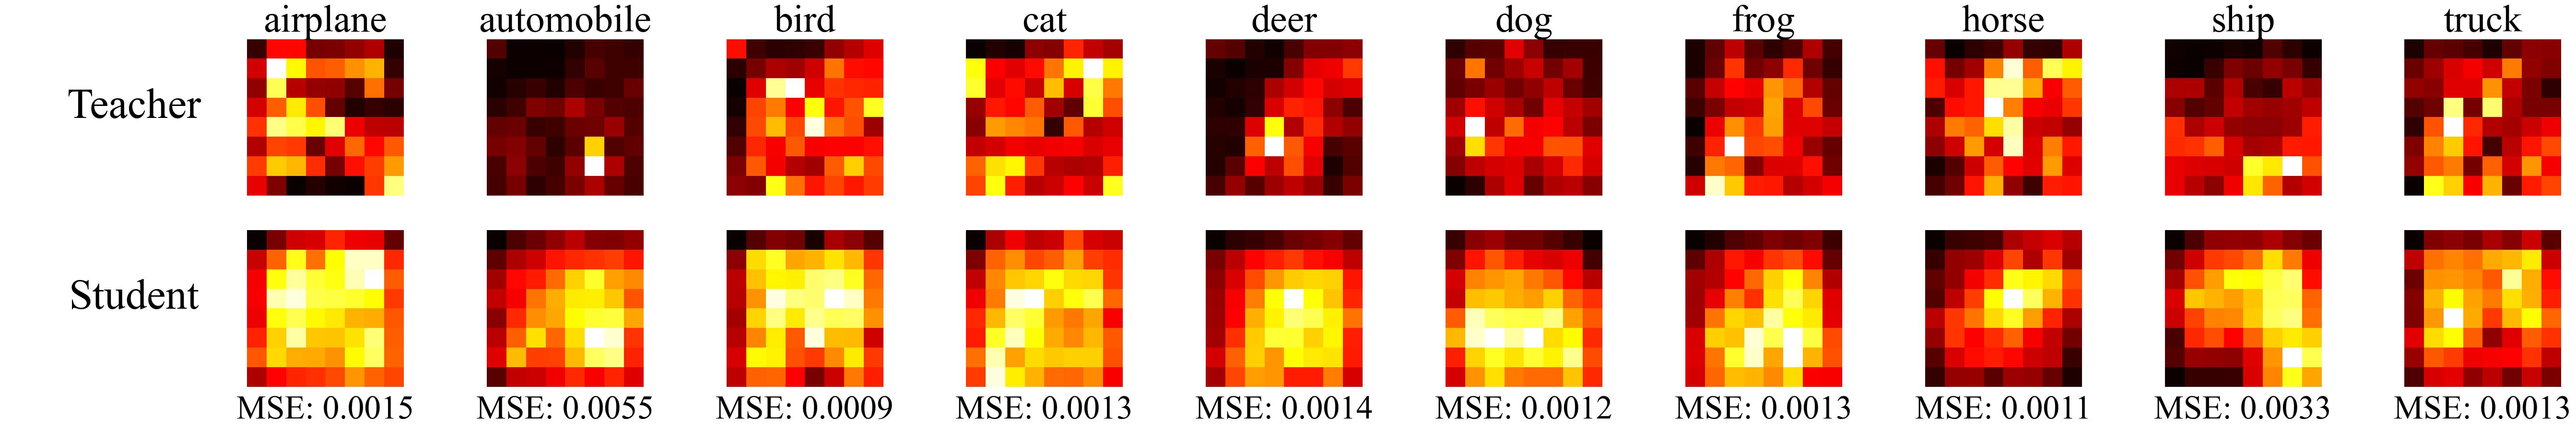

In [29]:
# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
num_classes = len(teacher_attention_maps)+1
fig, axs = plt.subplots(2, num_classes, figsize=(num_classes * 5, 10))  # Adjust figure size as needed
plt.rcParams['font.size'] = 48
plt.rcParams['font.family'] = 'Times New Roman'
def reshape_map(att_map):
    # Assuming the attention map needs to be square
    size = int(np.sqrt(len(att_map)))  # This assumes the map is of size n^2
    return att_map.reshape(size, size)

def compute_mse(map1, map2):
    # Assuming maps are already tensors or converting numpy arrays to tensors
    if isinstance(map1, np.ndarray):
        map1 = torch.tensor(map1)
    if isinstance(map2, np.ndarray):
        map2 = torch.tensor(map2)
    return attention_loss(map1, map2)

for i, (teacher_map, student_map) in enumerate(zip(teacher_attention_maps.values(), student_attention_maps.values())):
    if teacher_map is not None and student_map is not None:
        # Reshape maps if they are not in the correct shape
        if teacher_map.ndim == 1:
            teacher_map = reshape_map(teacher_map)
        if student_map.ndim == 1:
            student_map = reshape_map(student_map)

        # Compute MSE
        mse = compute_mse(teacher_map, student_map)
        
        # Plot teacher's attention map
        ax = axs[0, i+1]  # Row i, Column 0 for teacher
        ax.imshow(teacher_map, cmap='hot')  # Adjust cmap as needed
        ax.set_title(f'{class_names[i]}')
        ax.axis('off')  # Turn off axis labels

        # Plot student's attention map
        ax = axs[1, i+1]  # Row i, Column 1 for student
        ax.imshow(student_map, cmap='hot')
        # ax.set_title(f'{class_names[i]}')
        ax.axis('off')

        # Print MSE below the plots
        axs[1, i+1].text(0.5, -0.2, f'MSE: {mse:.4f}', transform=axs[1, i+1].transAxes, ha='center', fontsize=50, color='black')
        
axs[0, 0].text(0.8, 0.5, 'Teacher', transform=axs[0,0].transAxes, ha='center', fontsize=64, color='black')
axs[1, 0].text(0.8, 0.5, 'Student', transform=axs[1,0].transAxes, ha='center', fontsize=64, color='black')
ax = axs[0,0]
ax.axis('off')
ax = axs[1,0]
ax.axis('off')

plt.tight_layout()
plt.savefig('Attention_test.pdf')
plt.show()